In [1]:
import pandas as pd 
import numpy as np
import glob
from tqdm import tqdm
import cv2
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output
from math import sin, cos
from asift import Timer, image_resize, init_feature, filter_matches, affine_detect
from multiprocessing.pool import ThreadPool

# Загрузка данных

## Train

In [2]:
json_dir = "./train/json/"

data_df = pd.DataFrame({'id': [], "left_top_x": [], 'left_top_y': [], "right_bottom_x": [], 'right_bottom_y': [], 'angle': []})

json_true = []
for _, _, files in os.walk(json_dir):
    for x in files:
        if x.endswith(".json"):
            data = json.load(open(json_dir + x))
            new_row = {'id':x.split(".")[0]+".img", 'left_top_x':data["left_top"][0], 'left_top_y':data["left_top"][1], 'right_bottom_x': data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1], 'angle': data["angle"]}
            data_df = data_df.append(new_row, ignore_index=True)

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
<ipython-input-2-9306b6ad81d5>:11: FutureWarning: The frame.append method is deprecated and will be removed 

## Считаем центры 

In [3]:
data_df['width'] = (data_df['right_bottom_x'] - data_df['left_top_x']).abs()
data_df['height'] = (data_df['right_bottom_y'] - data_df['left_top_y']).abs()
data_df['center_x'] = ((data_df['right_bottom_x'] + data_df['left_top_x']) * 0.5).astype(int)
data_df['center_y'] = ((data_df['right_bottom_y'] + data_df['left_top_y']) * 0.5).astype(int)
data_df['id'] = data_df['id'].apply(lambda s: './train/img/' + s.split('.')[0]+'.png')
data_df[['width','height','angle']].describe()

width       height       angle
count   800.000000   800.000000  800.000000
mean    919.356250   926.186250  183.107500
std     447.666395   440.886173  105.093884
min       0.000000     0.000000    0.000000
25%     543.000000   565.000000   90.750000
50%    1024.000000  1024.000000  183.500000
75%    1333.000000  1343.000000  273.000000
max    1449.000000  1449.000000  359.000000

## Грузим подложку

In [4]:
original = np.array(Image.open('./original.tiff'))

/home/sergeif/.local/lib/python3.8/site-packages/PIL/Image.py:3035: DecompressionBombWarning: Image size (110166016 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


# Утилитарный код для загрузки повернутого кропа из подложки

(1024, 1024, 3) (1024, 1024, 3)


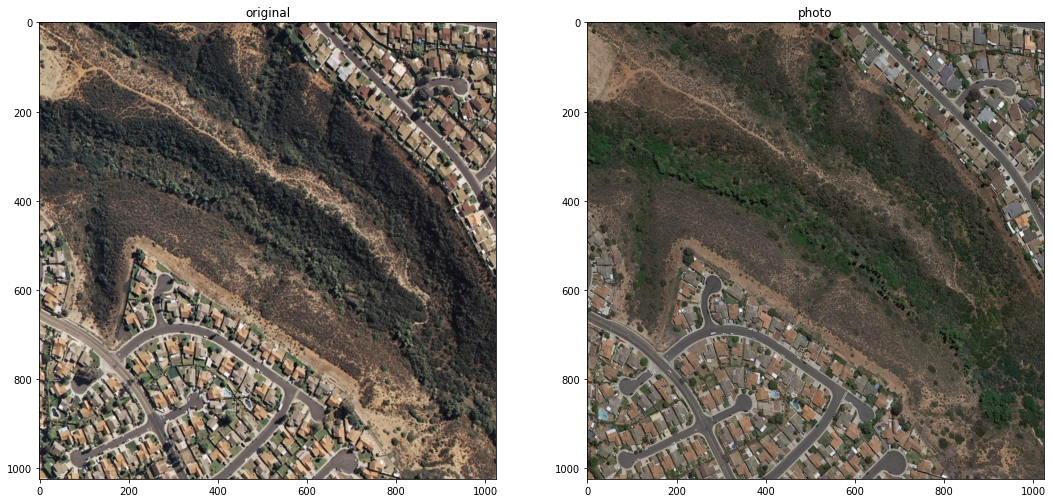

In [5]:
def rotate_image(image, point, angle):
    rot_mat = cv2.getRotationMatrix2D(point, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def get_fragment(center_x, center_y, angle, size_m=1):
    image_center = (center_x, center_y)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    cntr = np.matmul(rot_mat, np.array([center_x, center_y, 1]))
    
    fragment = rotate_image(original, image_center, angle)
    
    new_min_x = max(cntr[0]-512*size_m, 0)
    new_max_x = min(cntr[0]+512*size_m, 10496)
    new_min_y = max(cntr[1]-512*size_m, 0)
    new_max_y = min(cntr[1]+512*size_m, 10496)

    return fragment[int(new_min_y):int(new_max_y), int(new_min_x):int(new_max_x)]

def plot_ex(i):    
    fragment = get_fragment((data_df.iloc[i].left_top_x + data_df.iloc[i].right_bottom_x)*0.5, 
                            (data_df.iloc[i].left_top_y + data_df.iloc[i].right_bottom_y)*0.5, 
                            data_df.iloc[i].angle)
    fig, ax = plt.subplots(1,2,figsize=(18,9))
    ax[0].imshow(fragment)
    ax[0].set_title('original')
    img = np.array(Image.open(data_df.iloc[i]['id']))
    ax[1].imshow(img)
    ax[1].set_title('photo');
    print(img.shape, fragment.shape)
plot_ex(0)

# A-Sift keypoints

## Статья https://epubs.siam.org/doi/abs/10.1137/080732730

## Репозиторий https://github.com/Mars-Rover-Localization/PyASIFT

## Как это работает

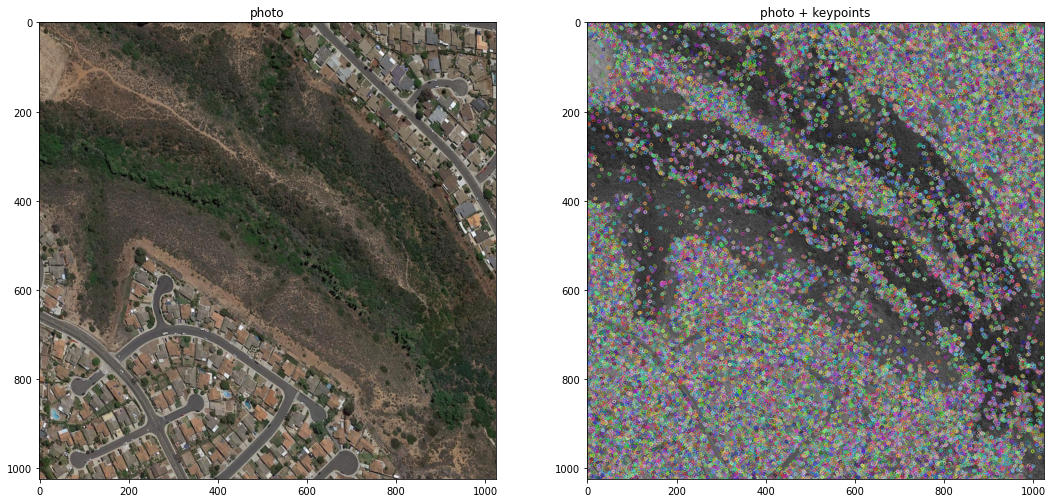

In [6]:
#инициализируем детектор и матчер
detector_name = "sift-flann"
detector, matcher = init_feature(detector_name)
#загрузим картинку 
img = np.array(Image.open(data_df.iloc[0]['id']))
#перведем в серый
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#найдем кейпойнты
with ThreadPool(processes=16) as pool:
    kp1, desc1 = affine_detect(detector, img1, pool=pool)
#нарисуем их на картинке
img1 = cv2.drawKeypoints(img1, kp1, img1)
fig, ax = plt.subplots(1,2,figsize=(18,9))
ax[0].imshow(img)
ax[0].set_title('photo')
ax[1].imshow(img1)
ax[1].set_title('photo + keypoints');

### Ну, в общем их очень много ) 

## Что делать с облаками?

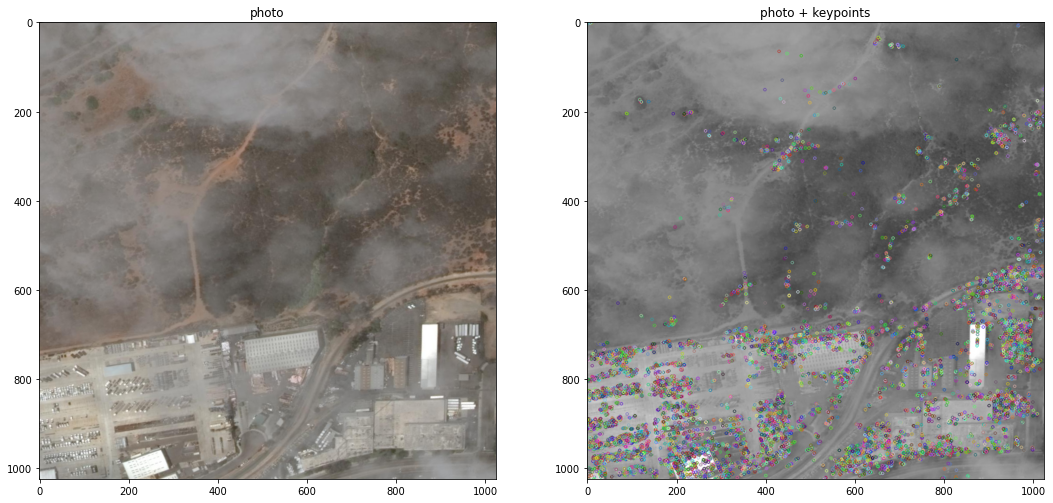

In [7]:
#загрузим картинку 
img = np.array(Image.open(data_df.iloc[4]['id']))
#перведем в серый
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#найдем кейпойнты
with ThreadPool(processes=16) as pool:
    kp1, desc1 = affine_detect(detector, img1, pool=pool)
#нарисуем их на картинке
img1 = cv2.drawKeypoints(img1, kp1, img1)
fig, ax = plt.subplots(1,2,figsize=(18,9))
ax[0].imshow(img)
ax[0].set_title('photo')
ax[1].imshow(img1)
ax[1].set_title('photo + keypoints');

### Ключевые точки выделяются плохо :(

# CLAHE!

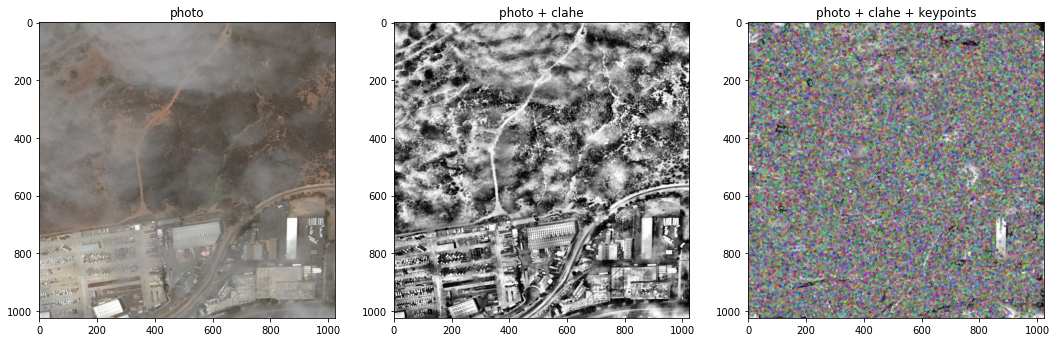

In [9]:
#загрузим картинку 
img = np.array(Image.open(data_df.iloc[4]['id']))
#перведем в серый
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=16, tileGridSize=(16,16))
img1 = clahe.apply(img1)
#найдем кейпойнты
with ThreadPool(processes=16) as pool:
    kp1, desc1 = affine_detect(detector, img1, pool=pool)
#нарисуем их на картинке
img2 = cv2.drawKeypoints(img1, kp1, img1)
fig, ax = plt.subplots(1,3,figsize=(18,9))
ax[0].imshow(img)
ax[0].set_title('photo')
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)
ax[1].imshow(img1)
ax[1].set_title('photo + clahe')
ax[2].imshow(img2)
ax[2].set_title('photo + clahe + keypoints');

### Теперь их очень много :)

# Поиск ближайшего соседа из выборки

## Разбито на две стадии:
### Если есть больше 10000 ключевых точек, то просто матчим с библиотекой наших фрагментов
### Если меньше, то берем CLAHE и матчим с библиотекой наших фрагментов

## Например, такая картинка из теста

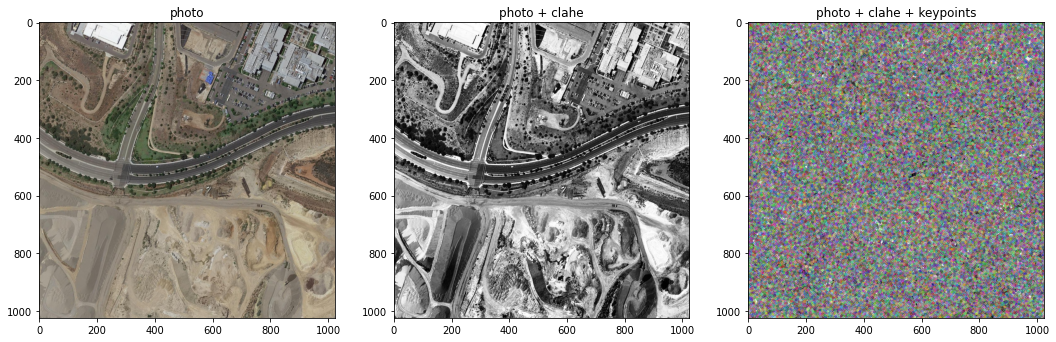

In [13]:
fl = data_df.iloc[33]['id']
#загрузим картинку 
img = np.array(Image.open(fl))
#перведем в серый
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=128, tileGridSize=(3,3))
img1 = clahe.apply(img1)
#найдем кейпойнты
with ThreadPool(processes=16) as pool:
    kp1, desc1 = affine_detect(detector, img2, pool=pool)
#нарисуем их на картинке
img2 = cv2.drawKeypoints(img1, kp1, img1)
fig, ax = plt.subplots(1,3,figsize=(18,9))
ax[0].imshow(img)
ax[0].set_title('photo')
img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2RGB)
ax[1].imshow(img1)
ax[1].set_title('photo + clahe')
ax[2].imshow(img2)
ax[2].set_title('photo + clahe + keypoints');

# Сматчим с какой-нибудь картинкой трейна

## Например, ./test/918.png с ./train/img/967.png

In [21]:
MAX_SIZE = 1024
ori_img1_ = np.array(Image.open('./test/918.png'))
ori_img1_ = cv2.cvtColor(ori_img1_, cv2.COLOR_BGR2GRAY)
ori_img1_ = clahe.apply(ori_img1_)

ori_img2_ = np.array(Image.open('./train/img/967.png'))
ori_img2_ = cv2.cvtColor(ori_img2_, cv2.COLOR_RGB2GRAY)
ori_img2_ = clahe.apply(ori_img2_)

detector_name = "sift-flann"
detector, matcher = init_feature(detector_name)

ratio_1 = 1
ratio_2 = 1

if ori_img1_.shape[0] > MAX_SIZE or ori_img1_.shape[1] > MAX_SIZE:
    ratio_1 = MAX_SIZE / ori_img1_.shape[1]
    print("Large input detected, image 1 will be resized")
    img1_ = image_resize(ori_img1_, ratio_1)
else:
    img1_ = ori_img1_

if ori_img2_.shape[0] > MAX_SIZE or ori_img2_.shape[1] > MAX_SIZE:
    ratio_2 = MAX_SIZE / ori_img2_.shape[1]
    print("Large input detected, image 2 will be resized")
    img2_ = image_resize(ori_img2_, ratio_2)
else:
    img2_ = ori_img2_

print(f"Using {detector_name.upper()} detector...")

# Profile time consumption of keypoints extraction
with Timer(f"Extracting {detector_name.upper()} keypoints..."):
    pool = ThreadPool(processes=cv2.getNumberOfCPUs())
    kp1, desc1 = affine_detect(detector, img1_, pool=pool)
    kp2, desc2 = affine_detect(detector, img2_, pool=pool)

print(f"img1 - {len(kp1)} features, img2 - {len(kp2)} features")

# Profile time consumption of keypoints matching
with Timer('Matching...'):
    raw_matches = matcher.knnMatch(desc1, trainDescriptors=desc2, k=2)

p1, p2, kp_pairs = filter_matches(kp1, kp2, raw_matches, ratio=0.7)

if len(p1) >= 4:
    # TODO: The effect of resizing on homography matrix needs to be investigated.
    # TODO: Investigate function consistency when image aren't resized.
    for index in range(len(p1)):
        pt = p1[index]
        p1[index] = pt / ratio_1

    for index in range(len(p2)):
        pt = p2[index]
        p2[index] = pt / ratio_2

    for index in range(len(kp_pairs)):
        element = kp_pairs[index]
        kp1, kp2 = element

        new_kp1 = cv2.KeyPoint(kp1.pt[0] / ratio_1, kp1.pt[1] / ratio_1, kp1.size)
        new_kp2 = cv2.KeyPoint(kp2.pt[0] / ratio_2, kp2.pt[1] / ratio_2, kp2.size)

        kp_pairs[index] = (new_kp1, new_kp2)

    H, status = cv2.findHomography(p1, p2, cv2.RANSAC, 100.0)
    print(f"{np.sum(status)} / {len(status)}  inliers/matched")
    # do not draw outliers (there will be a lot of them)
    kp_pairs = [kpp for kpp, flag in zip(kp_pairs, status) if flag]
else:
    H, status = None, None
    print(f"{len(p1)} matches found, not enough for homography estimation")


Using SIFT-FLANN detector...
Extracting SIFT-FLANN keypoints...
5304.2939 ms
img1 - 130795 features, img2 - 117355 features
Matching...
4089.7730 ms
28419 / 28569  inliers/matched


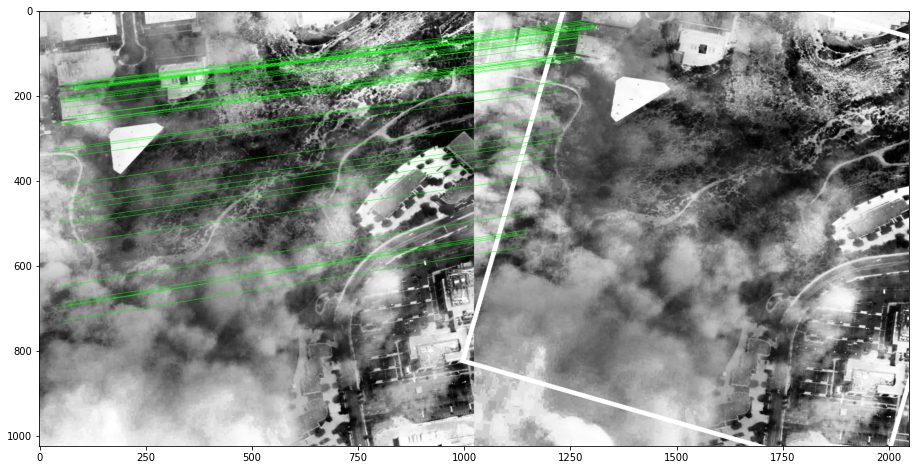

In [36]:
import math
h1, w1 = img1_.shape[:2]
h2, w2 = img2_.shape[:2]

# Create visualized result image
vis = np.zeros((max(h1, h2), w1 + w2), np.uint8)
vis[:h1, :w1] = img1_
vis[:h2, w1:w1 + w2] = img2_
vis = cv2.cvtColor(vis, cv2.COLOR_GRAY2BGR)

if H is not None:
    corners = np.float32([[0, 0], [w2, 0], [w2, h2], [0, h2]])
    corners = np.int32(cv2.perspectiveTransform(corners.reshape(1, -1, 2), H).reshape(-1, 2) + (w1, 0))
    cv2.polylines(vis, [corners], True, (255, 255, 255), thickness=10)

if status is None:
    status = np.ones(len(kp_pairs), np.bool_)
p1, p2 = [], []  # python 2 / python 3 change of zip unpacking

for kpp in kp_pairs:
    p1.append(np.int32(kpp[0].pt))
    p2.append(np.int32(np.array(kpp[1].pt) * ratio_2 + [w1, 0]))

green = (0, 255, 0)
red = (0, 0, 255)

for (x1, y1), (x2, y2) in [(p1[i], p2[i]) for i in range(10,50)]:
    #if inlier:
    cv2.line(vis, (x1, y1), (x2, y2), green)
        
fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(vis)

Зеленые это несколько матчей точек, а белым показан поворот трейн-изображения, который переводит картинку к тестовой